## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

## Objective 
Build a model to understand the factors car prices vary on and help a Chinese company enter the US car market.

## Importing Packages

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
## Reading data and creating dataset
data = pd.read_csv('CarPrice.csv')

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Spliting column
Splitting column into the company and car type as stated in the problem statement

In [5]:
data['CarName'] = data['CarName'].str.lower()
temp = data['CarName'].str.split(" ", n = 1, expand = True) 
data['company'] = temp[0]
data.drop('CarName', axis = 1, inplace=True)

In [6]:
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Checking column Data Type
Checking data type of the column to treat them accordingly.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

`Inference:`There are no null values in the dataset. There are few string columns that we need to convert to integer.
Also all of the columns have correct data type. So there is no need to convert any column data type. We only need to convert columns to integer using label encoding and creating dummy variables to feed to the model.

In [8]:
# Information about all the numerical data
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Checking unique values
Code to check the unique values of the columns in the dataset

In [9]:
output = []
for row in data.columns.tolist():
    output.append({'column': row, 'count': len(data[row].unique())})

unique = pd.DataFrame(output).sort_values('count')

In [10]:
unique.head()

,column,count
2,fueltype,2
3,aspiration,2
4,doornumber,2
7,enginelocation,2
6,drivewheel,3


In [11]:
# Front-wheel drive (FWD), rear-wheel drive (RWD), and four- or all-wheel drive (4WD or AWD). We have all of them as
# unique categories
data['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

## Cleaning data

In [12]:
# Checking number of unique company names we have in the dataset
data['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

`Inerence: ` We have misspelled company names in the dataset.

In [13]:
# Correcting the spelling mistakes
company_name_updated = {'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen',
                       'vw': 'volkswagen'}
data = data.replace({'company': company_name_updated})

In [14]:
data['company'].value_counts().head(10)

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
Name: company, dtype: int64

## Label Encoding variables 
Label Encoding the variables having two unique values.

In [15]:
## Label encoding fuel type
fuel_type = {'gas': 1, 'diesel': 0}
data['fueltype_isgas'] = data['fueltype'].map(fuel_type)
data.drop('fueltype', axis = 1, inplace=True)

In [16]:
## Label encoding aspiration
aspiration_type = {'std': 1, 'turbo': 0}
data['aspiration_std'] = data['aspiration'].map(aspiration_type)
data.drop('aspiration', axis = 1, inplace=True)

In [17]:
## Label encoding Number of doors car has
car_doors = {'four': 1, 'two': 0}
data['car_four_doors'] = data['doornumber'].map(car_doors)
data.drop('doornumber', axis = 1, inplace=True)

In [18]:
## Label encoding engine Location
car_doors = {'front': 1, 'rear': 0}
data['car_engine_front'] = data['enginelocation'].map(car_doors)
data.drop('enginelocation', axis = 1, inplace=True)

## Dropping columns
Dropping columns which are not adding any value or not needed in model

In [19]:
## Dropping car_id as it is unique for all the rows
data.drop('car_ID', axis = 1, inplace=True)

In [20]:
categorical_string_columns = data.select_dtypes(include=['object']).columns

## Exploratory Data Analytics
Visulazing and understanding the dataset

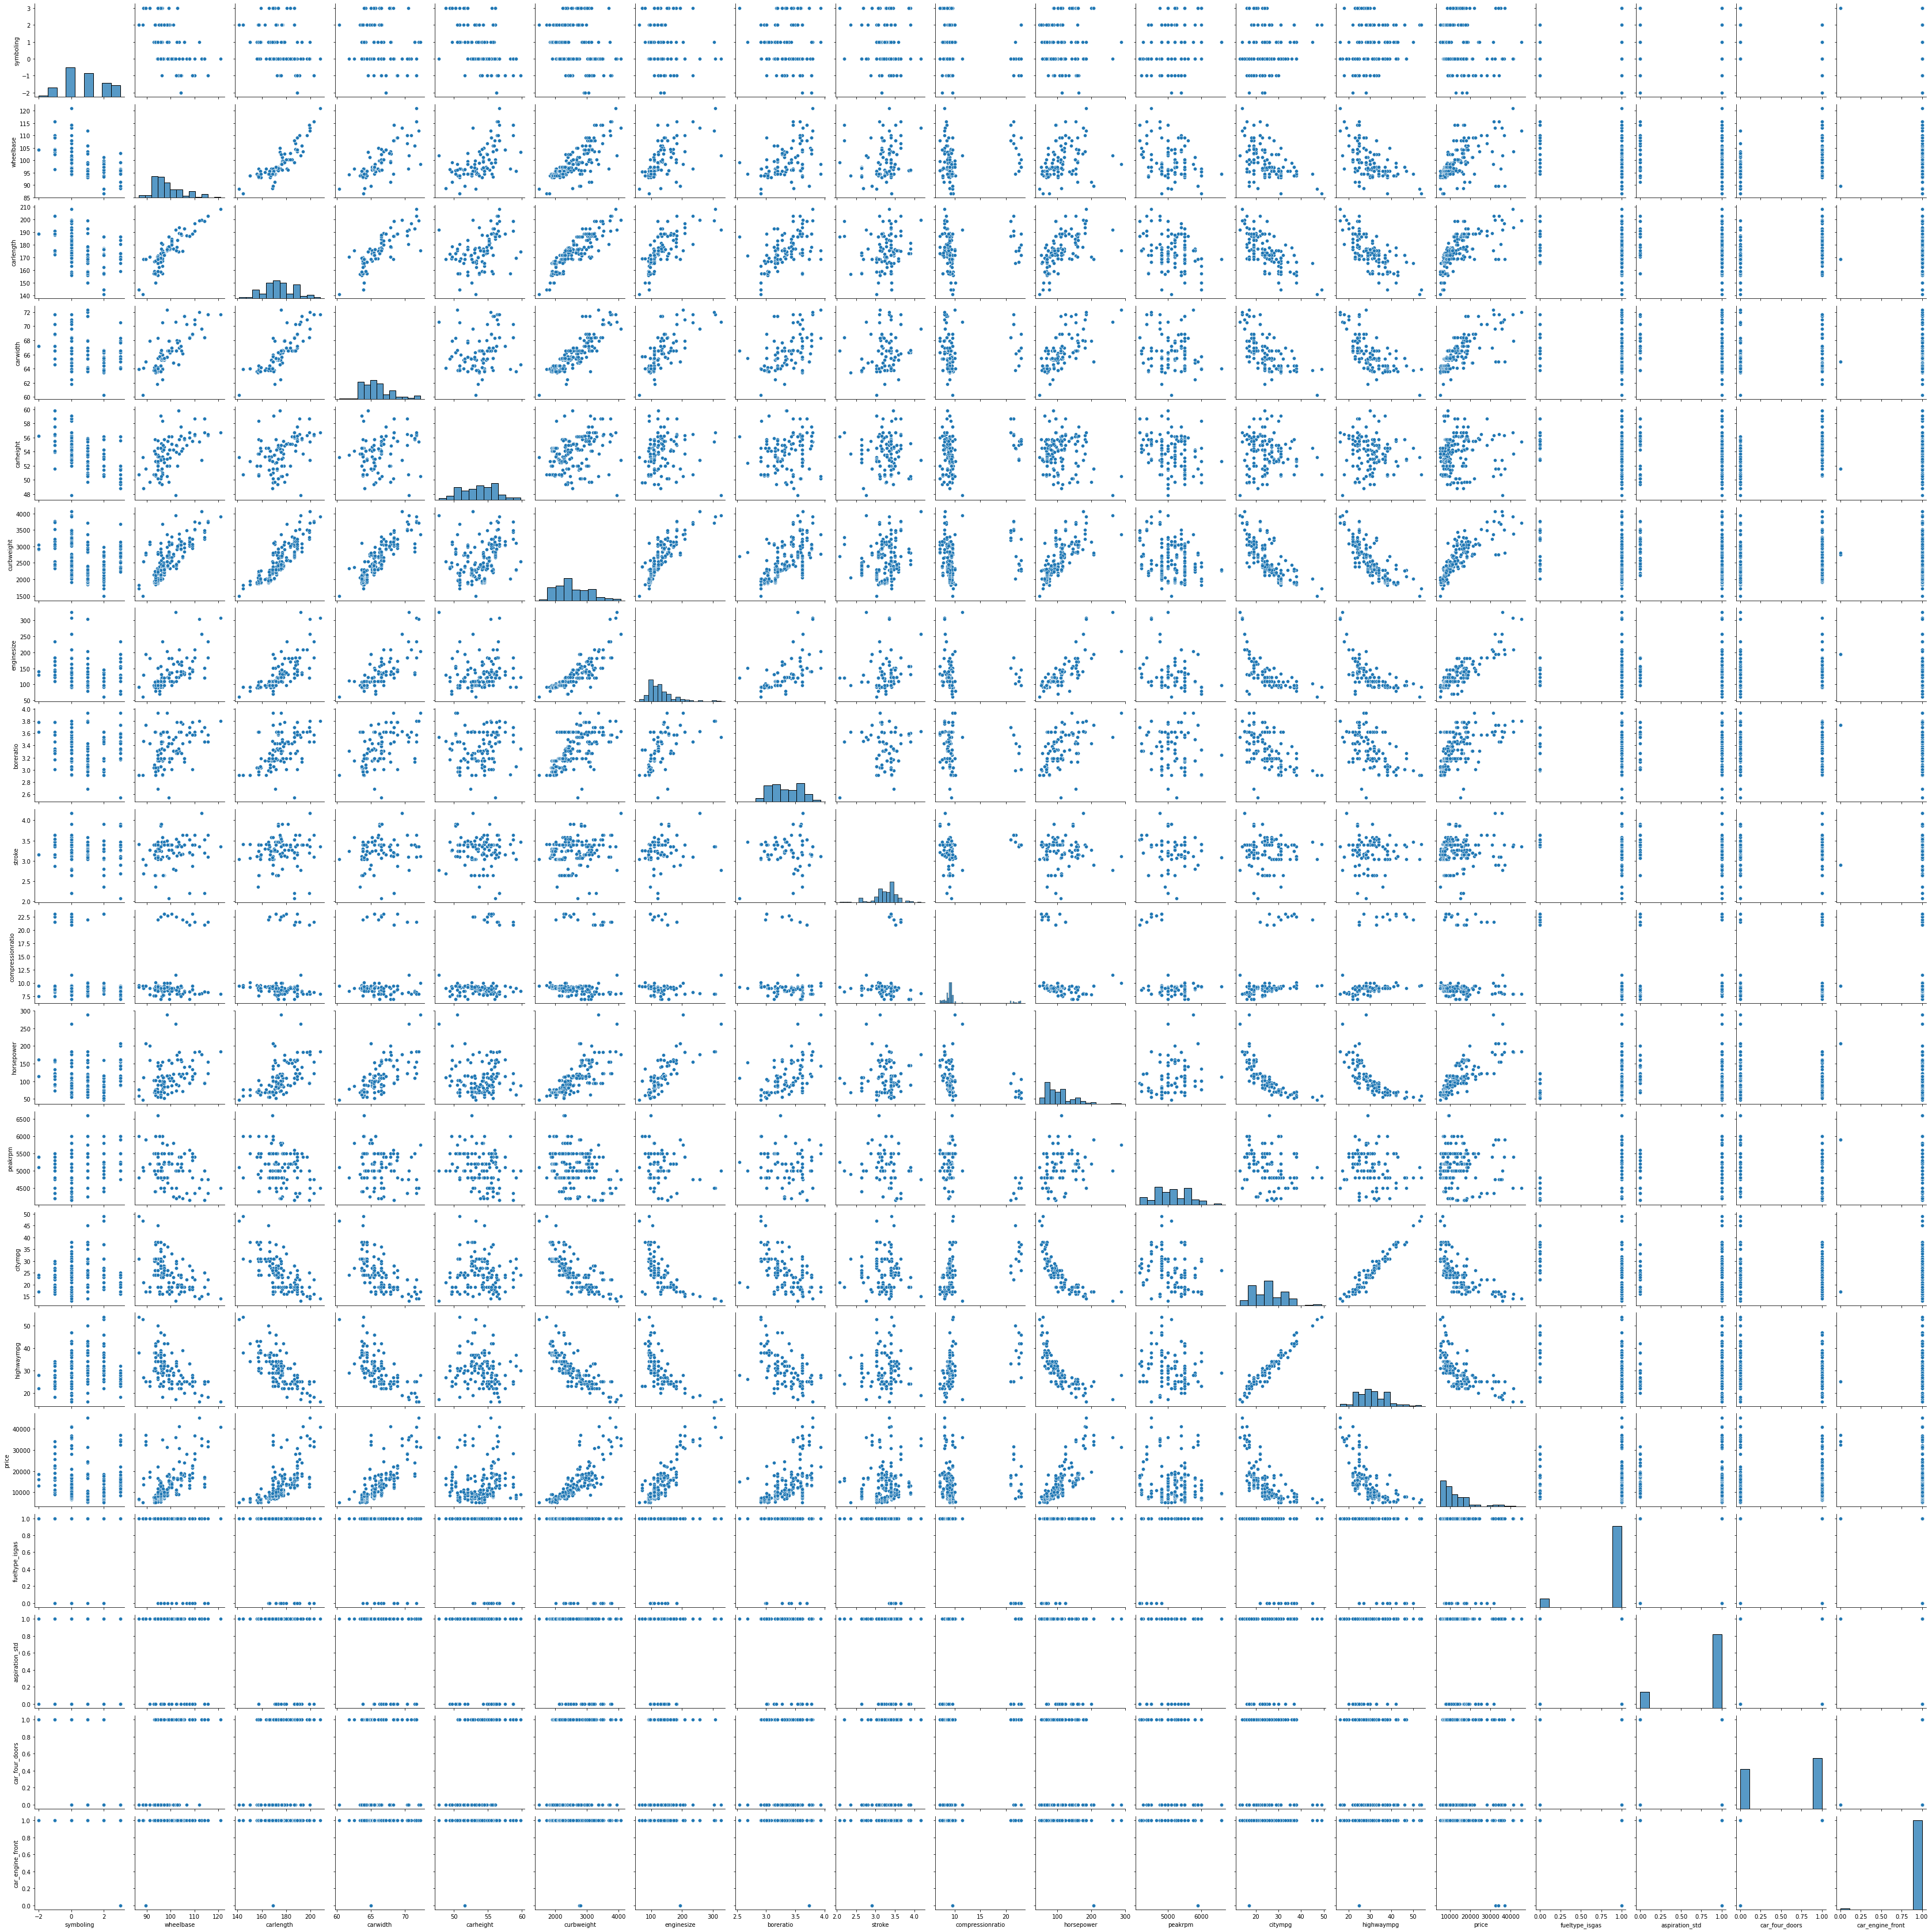

In [21]:
sns.pairplot(data)
plt.show()

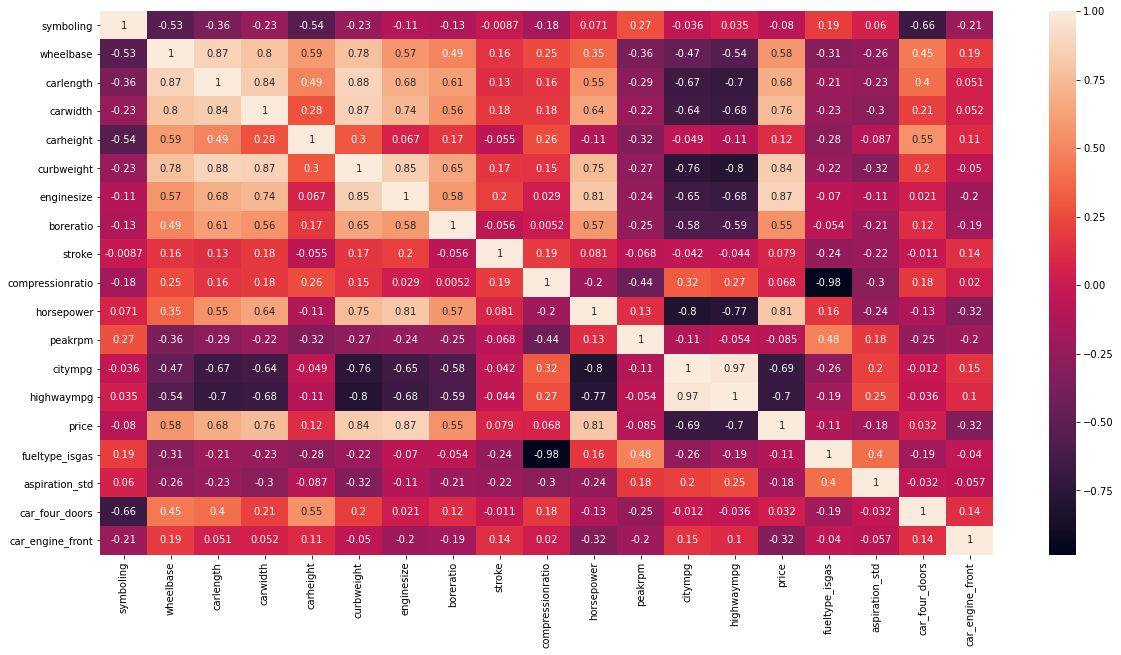

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

`Inference:` There are strong correlation of many independent variables with the price. There are lot more other variables having strong correlation:
- carlength: wheelbase, carwidth, curbweight
- curbweight: carwidth, enginesize, horsepower, carlength, wheelbase
- enginesize: horsepower, crubweight and dimensions of car
- highway: city mpg
There are lot of strong correlations, we need to address this issue. We either need to create drived features. Or we need to drop strong correlated independent variables.

There are also features having strong negative corelation:
- compression ratio and fueltype_isgas
- citympg and horsepower

### Visualizing categorical columns

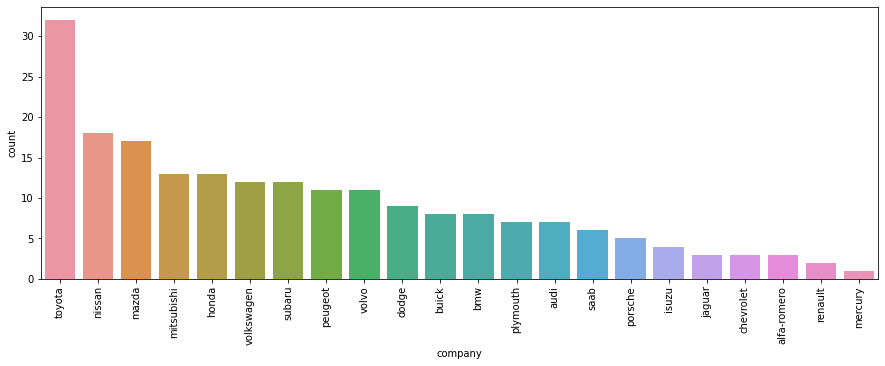

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(data['company'], order = data['company'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

`Inference: ` The dataset contains most of the car data for toyota, nissan, mazda etc. 

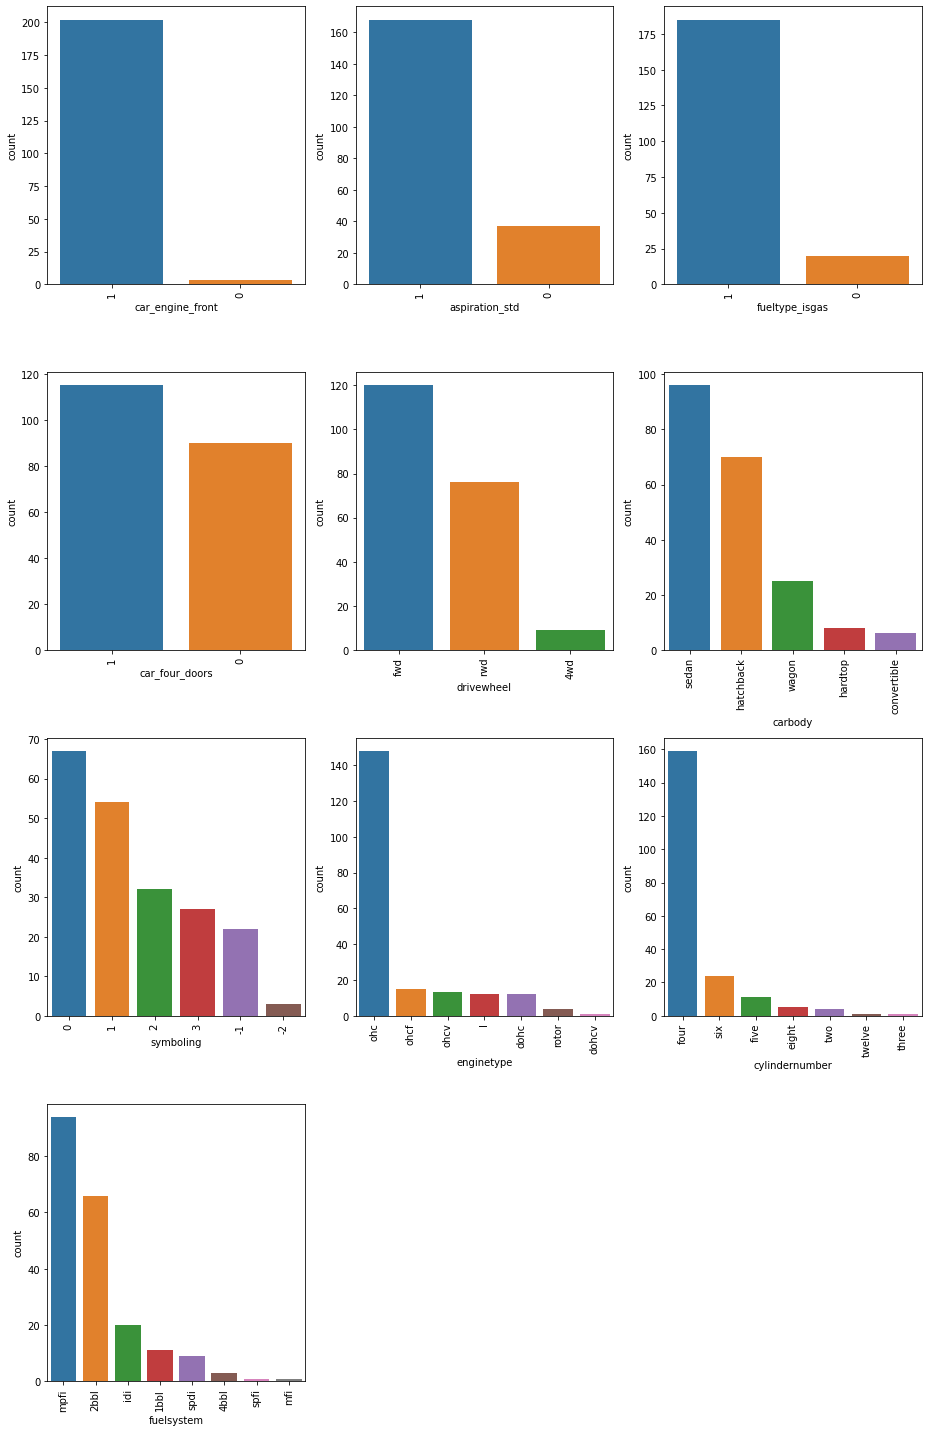

In [24]:
plt.figure(figsize=(13,20))
columns = ['car_engine_front', 'aspiration_std', 'fueltype_isgas', 'car_four_doors', 'drivewheel', 'carbody',
           'symboling', 'enginetype', 'cylindernumber', 'fuelsystem']

for i in range(len(columns)):
    plt.subplot(4,3,i + 1)
    sns.countplot(data[columns[i]], order = data[columns[i]].value_counts().index)
    plt.xticks(rotation=90)

plt.tight_layout()
    
plt.show()


`Inferences:`
- Most of the cars have engine in front
- Most of the cars have aspiration as standard
- Most of the cars have fuel type as gas
- Cars have equal proportion of four doors or not
- Most of the cars have bosy as sedan
- There are very less cars having good insurnce rating
- Most of the cars have engine type as ohc
- Most of the cars have four cylinders

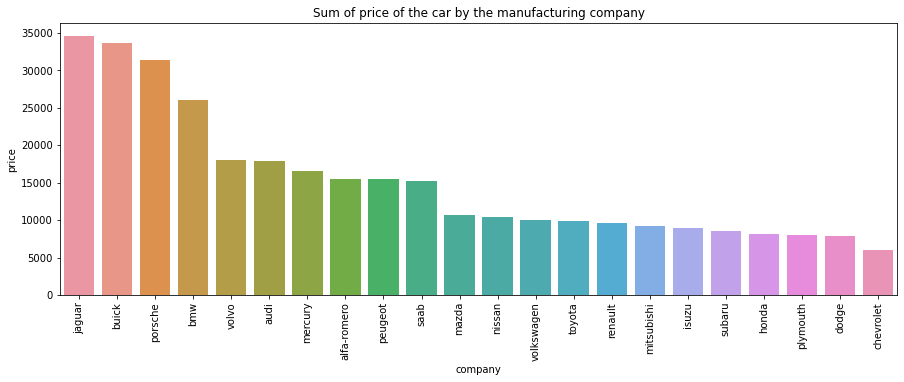

In [25]:
plt.figure(figsize=(15,5))
t = data.groupby('company')['price'].mean().reset_index()
t.sort_values('price', ascending=False, inplace=True)
sns.barplot(x='company', y='price', data=t)
plt.title('Sum of price of the car by the manufacturing company')
plt.xticks(rotation=90)
plt.show()

`Inference: ` Jaguar, buick, porsche, bmw are the companies producing expensive cars.

## Creating derived columns

In [26]:
# Creating drived column as car length and car base area are highly correlated.
data['car_base_area'] = data['carlength'] * data['carwidth']

# Creating column to get the diemension of the car in the dataset.
data['car_rect_shape'] = data['carlength'] * data['carwidth'] * data['carheight']

In [27]:
# Creating derived column based on the company price of the car. It will help the Chinise Automobile 
# company to decide the car prices and features to provide.
def carCategory(x):
    result = None
    if x >= 20000.0:
        result = 'High'
    elif x < 20000.0 and x >= 8000.0:
        result = 'Medium'
    else:
        result = 'Low'
    return result

In [28]:
t = data.groupby('company')['price'].mean().transform(carCategory)
t = t.reset_index()
t.columns = ['company', 'company_category']

In [29]:
data = pd.merge(data, t, how='left', on='company')

In [30]:
## Created three derived columns
data.head()

,symboling,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,fueltype_isgas,aspiration_std,car_four_doors,car_engine_front,car_base_area,car_rect_shape,company_category
0,3,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,0,1,10820.08,528019.904,Medium
1,3,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,0,1,10820.08,528019.904,Medium
2,1,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,0,1,11213.60,587592.640,Medium
3,2,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,1,1,11690.92,634816.956,Medium
4,2,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,1,1,11726.24,636734.832,Medium


## Creating Dummy Variables
Identifying the categorical columns and converting them to dummies.

In [31]:
categorical_string_columns_list = list(categorical_string_columns)
categorical_string_columns_list.append('company_category')

# Removing company column from the model as it won't be helpful for the company as they want to strat there own 
# company. This column can be helpful to decide the category of the car to manufacture. For that I have created
# derived column
categorical_string_columns_list.remove('company')

In [32]:
temp_data = None
temp_data = pd.get_dummies(data[categorical_string_columns_list])

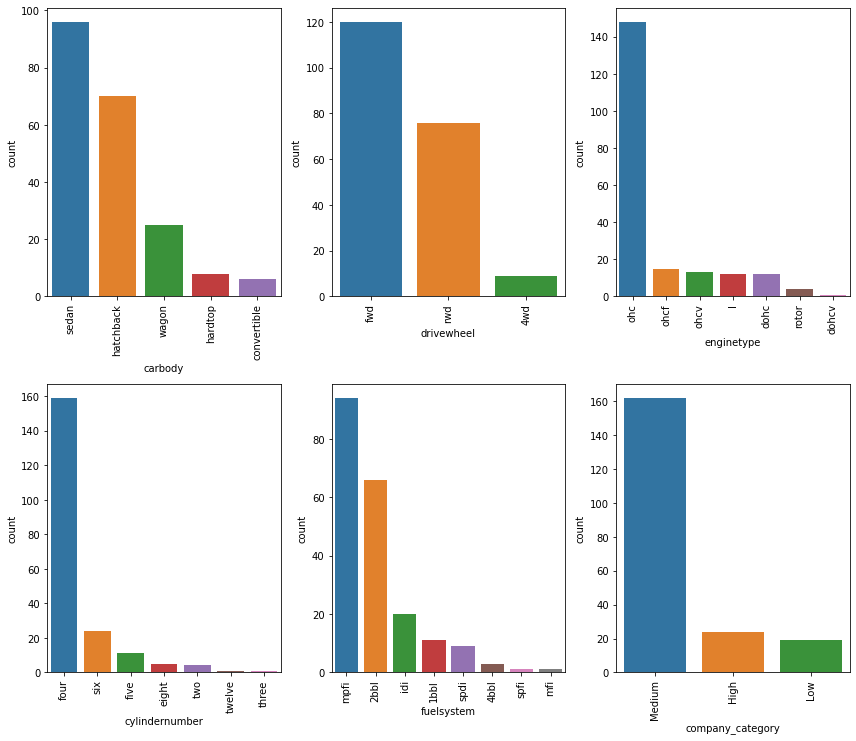

In [33]:
plt.figure(figsize=(12,20))

for i in range(len(categorical_string_columns_list)):
    plt.subplot(4,3,i + 1)
    sns.countplot(data[categorical_string_columns_list[i]], order = data[categorical_string_columns_list[i]].value_counts().index)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

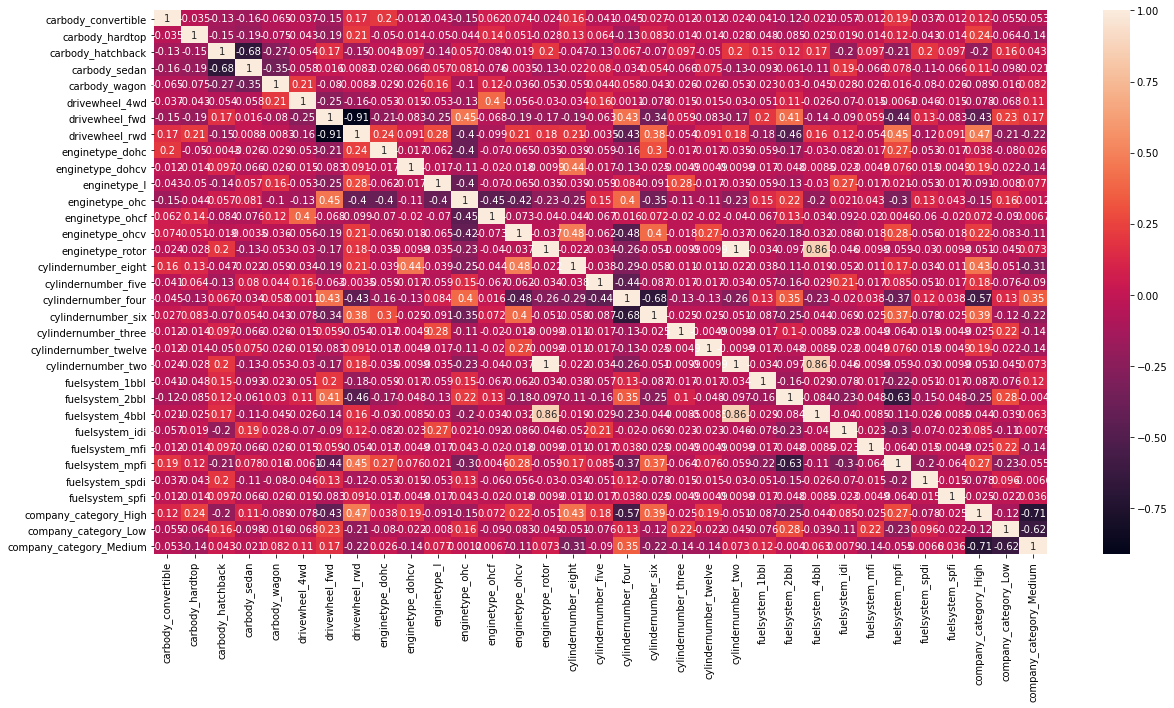

In [34]:
# Checking significance of numeric and categorical variables
plt.figure(figsize=(20,10))
sns.heatmap(temp_data.corr(), annot=True)
plt.show()

In [35]:
## Dropping one dummy columns having least number of rows or high correlation
temp_data.drop(['carbody_hatchback',
         'drivewheel_rwd',
         'enginetype_l',
         'cylindernumber_eight',
         'fuelsystem_2bbl',
         'company_category_Low'],axis=1,inplace=True)

In [36]:
temp_data.head()

,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,enginetype_dohc,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_category_High,company_category_Medium
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [37]:
categorical_string_columns_list.append('carlength')
categorical_string_columns_list.append('carwidth')
categorical_string_columns_list.append('carheight')
categorical_string_columns_list.append('company')

## Dropping because it is having high correlation with fuelsystem_idi and compress ratio
categorical_string_columns_list.append('fueltype_isgas') 

df = pd.concat([data, temp_data], axis = 1)
df.drop(categorical_string_columns_list, axis = 1, inplace = True)
df.head()

,symboling,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_std,car_four_doors,car_engine_front,car_base_area,car_rect_shape,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,enginetype_dohc,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_category_High,company_category_Medium
0,3,88.6,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,10820.08,528019.904,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,3,88.6,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,10820.08,528019.904,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,94.5,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,11213.60,587592.640,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,2,99.8,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,1,1,11690.92,634816.956,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,2,99.4,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,1,1,11726.24,636734.832,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [38]:
df.shape

(205, 44)

## Splitting data into test and train

In [39]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [40]:
scaler = MinMaxScaler()

In [41]:
## Using Min and Max scaler to transform and scale all the variables in the dataset having value greater than 1.
num_vars = ['symboling', 'wheelbase', 'curbweight', 'enginesize', 'boreratio','stroke', 'compressionratio', 'price',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'car_base_area', 'car_rect_shape']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
df_train.head()

,symboling,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_std,car_four_doors,car_engine_front,car_base_area,car_rect_shape,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,enginetype_dohc,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_category_High,company_category_Medium
177,0.2,0.544828,0.284379,0.203125,0.550000,0.700000,0.10625,0.169492,0.020408,0.56,0.516129,0.152177,1,1,1,0.461074,0.455447,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
75,0.6,0.555172,0.485536,0.273438,0.885714,0.500000,0.06250,0.521186,0.346939,0.24,0.258065,0.282632,0,0,1,0.546916,0.556137,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
174,0.2,0.544828,0.294170,0.156250,0.521429,0.609524,0.96875,0.088983,0.142857,0.68,0.548387,0.138523,0,1,1,0.461074,0.488682,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
31,0.8,0.000000,0.000000,0.085938,0.264286,0.638095,0.13750,0.101695,0.755102,0.72,0.709677,0.043121,1,0,1,0.000000,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
12,0.4,0.503448,0.396529,0.367188,0.550000,0.533333,0.12500,0.292373,0.040816,0.32,0.387097,0.393526,1,0,1,0.419315,0.434623,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [43]:
df_train.describe()

,symboling,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_std,car_four_doors,car_engine_front,car_base_area,car_rect_shape,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,enginetype_dohc,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_category_High,company_category_Medium
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.00000
mean,0.569231,0.425175,0.335664,0.222711,0.557542,0.565501,0.186499,0.227539,0.410019,0.472727,0.461990,0.205812,0.811189,0.559441,0.986014,0.436478,0.435356,0.034965,0.027972,0.489510,0.118881,0.034965,0.580420,0.076923,0.006993,0.720280,0.055944,0.062937,0.013986,0.034965,0.797203,0.118881,0.0,0.006993,0.013986,0.062937,0.006993,0.083916,0.0,0.496503,0.041958,0.006993,0.118881,0.79021
std,0.247019,0.209439,0.232474,0.161861,0.194528,0.146397,0.234064,0.170949,0.198854,0.236626,0.201036,0.194490,0.392734,0.498199,0.117845,0.220400,0.227088,0.184337,0.165472,0.501647,0.324786,0.184337,0.495225,0.267406,0.083624,0.450439,0.230621,0.243703,0.117845,0.184337,0.403496,0.324786,0.0,0.083624,0.117845,0.243703,0.083624,0.278236,0.0,0.501745,0.201198,0.083624,0.324786,0.40859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.400000,0.272414,0.165332,0.109375,0.435714,0.497619,0.096875,0.095339,0.265306,0.240000,0.290323,0.068976,1.000000,0.000000,1.000000,0.278026,0.277965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.00000
50%,0.600000,0.365517,0.277704,0.195312,0.550000,0.571429,0.125000,0.182203,0.428571,0.440000,0.451613,0.140931,1.000000,1.000000,1.000000,0.399793,0.424164,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.00000
75%,0.800000,0.537931,0.504673,0.277344,0.714286,0.635714,0.150000,0.271186,0.551020,0.680000,0.580645,0.284358,1.000000,1.000000,1.000000,0.599446,0.586022,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.00000


In [44]:
# Out of 205 observations. We will be creating model on 143 scaled observations.
df_train.shape

(143, 44)

In [45]:
# Removing target variable from the datset
y_train = df_train.pop('price')
X_train = df_train

In [46]:
# Creating sklearn linear regression model on all the features.
lm = LinearRegression()
lm.fit(X_train, y_train)

# Selecting 15 features using automation
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [47]:
# Finding out the top 15 significant independent variable using automation technique.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 14),
 ('wheelbase', False, 12),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 4),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 5),
 ('citympg', False, 16),
 ('highwaympg', False, 25),
 ('aspiration_std', True, 1),
 ('car_four_doors', False, 26),
 ('car_engine_front', True, 1),
 ('car_base_area', True, 1),
 ('car_rect_shape', False, 10),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 8),
 ('carbody_sedan', False, 24),
 ('carbody_wagon', False, 11),
 ('drivewheel_4wd', False, 15),
 ('drivewheel_fwd', False, 22),
 ('enginetype_dohc', False, 6),
 ('enginetype_dohcv', True, 1),
 ('enginetype_ohc', False, 23),
 ('enginetype_ohcf', False, 20),
 ('enginetype_ohcv', False, 3),
 ('enginetype_rotor', False, 13),
 ('cylindernumber_five', False, 2),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 28),
 ('cylindernumber_twelve'

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'enginesize', 'boreratio', 'compressionratio',
       'horsepower', 'aspiration_std', 'car_engine_front', 'car_base_area',
       'carbody_convertible', 'enginetype_dohcv', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'fuelsystem_idi',
       'company_category_High'],
      dtype='object')

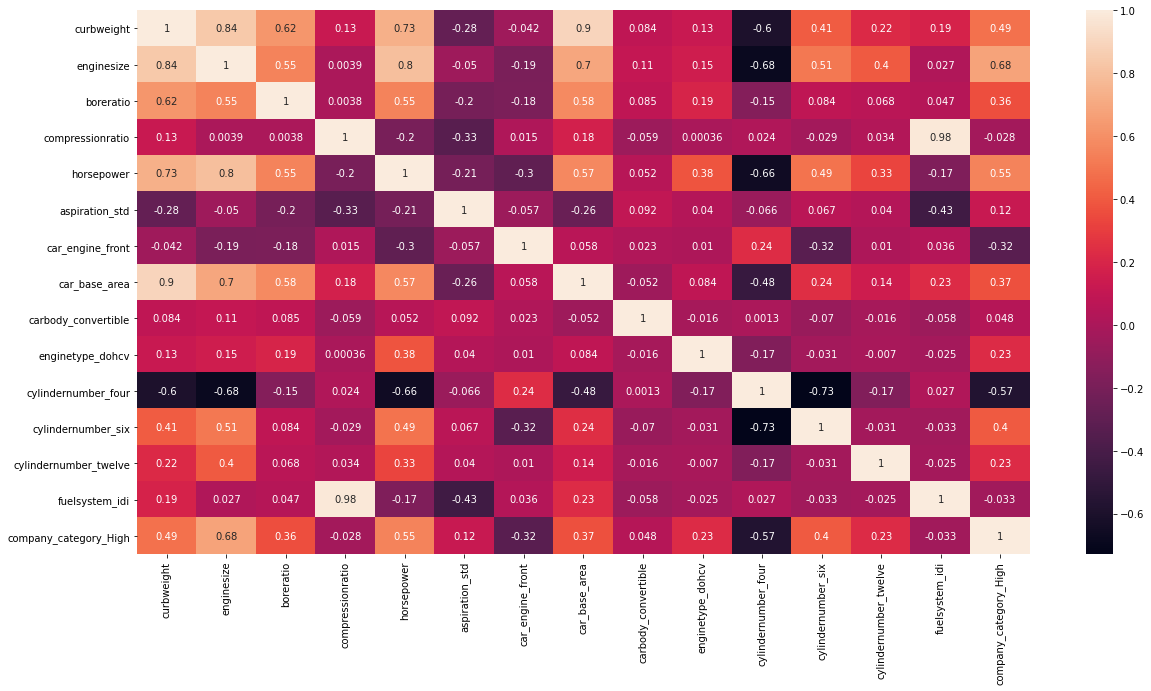

In [49]:
# Checking the correlation of the top 15 significant variables found using automation technique.
plt.figure(figsize=(20,10))
sns.heatmap(X_train[col].corr(), annot=True)
plt.show()

In [50]:
X_train_lm = sm.add_constant(X_train[col])

In [51]:
lr = sm.OLS(y_train, X_train_lm).fit()

In [52]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           2.08e-79
Time:                        20:20:12   Log-Likelihood:                 257.74
No. Observations:                 143   AIC:                            -483.5
Df Residuals:                     127   BIC:                            -436.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,compressionratio,109.01
13,fuelsystem_idi,85.83
0,curbweight,42.64
7,car_base_area,37.65
6,car_engine_front,34.78
1,enginesize,26.51
2,boreratio,24.02
4,horsepower,21.39
10,cylindernumber_four,18.02
5,aspiration_std,16.26


`Inference: ` Here we will be using now manual techniques to find out independent variables with significance and low VIF value.

In [54]:
# Dropping compressionratio as high VIF
col = col.drop('compressionratio')

In [55]:
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     176.0
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           2.34e-76
Time:                        20:20:13   Log-Likelihood:                 246.84
No. Observations:                 143   AIC:                            -463.7
Df Residuals:                     128   BIC:                            -419.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [56]:
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,40.04
6,car_base_area,36.67
5,car_engine_front,33.45
1,enginesize,24.57
2,boreratio,23.94
3,horsepower,19.32
9,cylindernumber_four,17.87
4,aspiration_std,9.94
10,cylindernumber_six,3.70
13,company_category_High,2.53


`Inference: ` Since fueltype_isgas column has high p value and VIF so we will remove this column from the set

In [57]:
# Dropping fuelsystem_idi as high p value
col = col.drop('fuelsystem_idi')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     190.5
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           1.99e-77
Time:                        20:20:13   Log-Likelihood:                 246.64
No. Observations:                 143   AIC:                            -465.3
Df Residuals:                     129   BIC:                            -423.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

In [58]:
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,39.97
6,car_base_area,35.83
5,car_engine_front,32.28
1,enginesize,24.21
2,boreratio,23.59
9,cylindernumber_four,17.70
3,horsepower,13.06
4,aspiration_std,7.33
10,cylindernumber_six,3.35
12,company_category_High,2.51


In [59]:
# Dropping curbweight as high VIF and p value
col = col.drop('curbweight')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     202.3
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           7.29e-78
Time:                        20:20:13   Log-Likelihood:                 244.77
No. Observations:                 143   AIC:                            -463.5
Df Residuals:                     130   BIC:                            -425.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,car_engine_front,32.27
1,boreratio,22.97
0,enginesize,20.77
8,cylindernumber_four,17.47
5,car_base_area,16.29
2,horsepower,13.04
3,aspiration_std,6.31
9,cylindernumber_six,3.23
11,company_category_High,2.50
10,cylindernumber_twelve,1.74


In [61]:
# Dropping car_engine_front as high VIF
col = col.drop('car_engine_front')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     188.4
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           1.35e-74
Time:                        20:20:13   Log-Likelihood:                 233.54
No. Observations:                 143   AIC:                            -443.1
Df Residuals:                     131   BIC:                            -407.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,boreratio,22.63
0,enginesize,20.77
2,horsepower,12.73
4,car_base_area,12.43
7,cylindernumber_four,8.99
3,aspiration_std,4.80
8,cylindernumber_six,3.00
10,company_category_High,2.47
9,cylindernumber_twelve,1.74
6,enginetype_dohcv,1.55


In [63]:
# Dropping boreratio as high VIF and p value
col = col.drop('boreratio')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     206.4
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           1.87e-75
Time:                        20:20:13   Log-Likelihood:                 232.75
No. Observations:                 143   AIC:                            -443.5
Df Residuals:                     132   BIC:                            -410.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,19.99
3,car_base_area,11.20
1,horsepower,10.95
6,cylindernumber_four,5.68
2,aspiration_std,4.79
7,cylindernumber_six,2.98
9,company_category_High,2.43
8,cylindernumber_twelve,1.62
5,enginetype_dohcv,1.55
4,carbody_convertible,1.19


In [65]:
# Dropping enginesize as high VIF
col = col.drop('enginesize')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     215.5
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           9.11e-75
Time:                        20:20:13   Log-Likelihood:                 228.08
No. Observations:                 143   AIC:                            -436.2
Df Residuals:                     133   BIC:                            -406.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,8.85
2,car_base_area,6.84
5,cylindernumber_four,5.66
1,aspiration_std,4.69
6,cylindernumber_six,2.81
8,company_category_High,1.95
4,enginetype_dohcv,1.53
7,cylindernumber_twelve,1.38
3,carbody_convertible,1.12


In [67]:
# Dropping cylindernumber_twelve as high p value
col = col.drop('cylindernumber_twelve')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     237.2
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           3.47e-75
Time:                        20:20:13   Log-Likelihood:                 226.13
No. Observations:                 143   AIC:                            -434.3
Df Residuals:                     134   BIC:                            -407.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,7.24
2,car_base_area,6.58
5,cylindernumber_four,5.27
1,aspiration_std,4.54
6,cylindernumber_six,2.36
7,company_category_High,1.94
4,enginetype_dohcv,1.39
3,carbody_convertible,1.09


In [69]:
# Dropping horsepower as high VIF
col = col.drop('horsepower')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     174.2
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           2.33e-64
Time:                        20:20:14   Log-Likelihood:                 196.61
No. Observations:                 143   AIC:                            -377.2
Df Residuals:                     135   BIC:                            -353.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,cylindernumber_four,5.09
0,aspiration_std,4.45
1,car_base_area,3.65
5,cylindernumber_six,1.86
6,company_category_High,1.79
3,enginetype_dohcv,1.10
2,carbody_convertible,1.06


In [71]:
# Dropping horsepower as high p value
col = col.drop('enginetype_dohcv')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     204.5
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           1.68e-65
Time:                        20:20:14   Log-Likelihood:                 196.54
No. Observations:                 143   AIC:                            -379.1
Df Residuals:                     136   BIC:                            -358.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,cylindernumber_four,5.02
0,aspiration_std,4.40
1,car_base_area,3.63
4,cylindernumber_six,1.80
5,company_category_High,1.73
2,carbody_convertible,1.06


In [73]:
# Dropping cylindernumber_six as high p value
col = col.drop('cylindernumber_six')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     246.6
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           1.19e-66
Time:                        20:20:14   Log-Likelihood:                 196.37
No. Observations:                 143   AIC:                            -380.7
Df Residuals:                     137   BIC:                            -363.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,cylindernumber_four,3.85
0,aspiration_std,3.82
1,car_base_area,3.16
4,company_category_High,1.71
2,carbody_convertible,1.05


`Inference: ` The most important columns/ features affecting the car price in US market are:
- Cars having four cyliners
- Cars having aspiration as standard
- Car Base area
- Company belonging to high category like bmw, porsche, jaguar etc
- Car body is convertible

The linear equation that we have from the model is: `y = 0.1590  - 0.0651 * aspiration_std + 0.3624 * car_base_area + 0.1517 * carbody_convertible - 0.1234 * cylindernumber_four + 0.2905 * company_category_High`

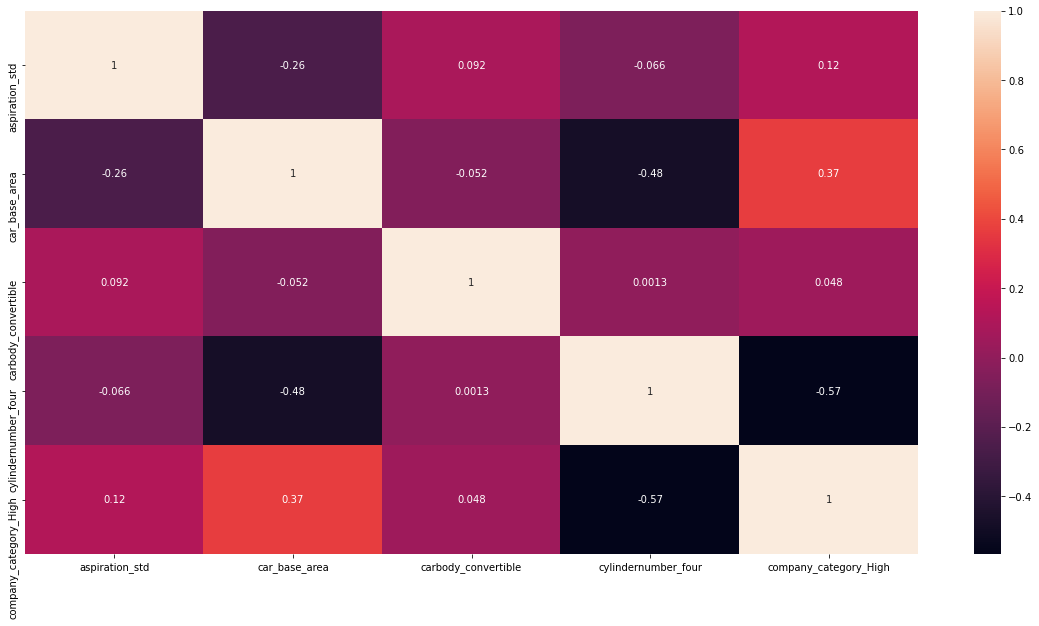

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train[col].corr(), annot=True)
plt.show()

`Inference: `
- Company producing expensive cars are using four cylinders.
- Two drived columns created are significant and have low VIF. Therefore used in the model.

## Residual Analysis
Perofrming residual analysis to confirm that assumptions that Regression model holds.

In [76]:
r_data = X_train[col]
r_data_new = sm.add_constant(r_data)
y_train_predict = lr.predict(r_data_new)

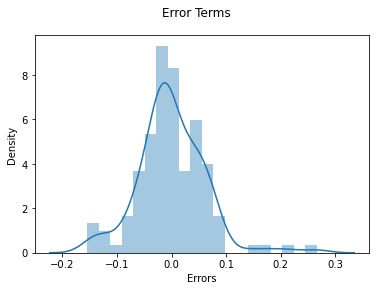

In [77]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')   
plt.show()

`Inference: ` Since the error terms are almost following a bell curve and mean is around 0. Therefore we can confirm that the model hold's the assumptions for the regression model.

## Testing Model
Now we have trainned model on the training dataset, next step is to verify the model. But before verifying the model we need to predict on the test dataset (data which model has not seen).

In [78]:
num_vars = ['symboling', 'wheelbase', 'curbweight', 'enginesize', 'boreratio','stroke', 'compressionratio', 'price',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'car_base_area', 'car_rect_shape']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [79]:
y_test = df_test.pop('price')
X_test = df_test

In [80]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [81]:
y_pred = lr.predict(X_test_new)

## Model Evaluation

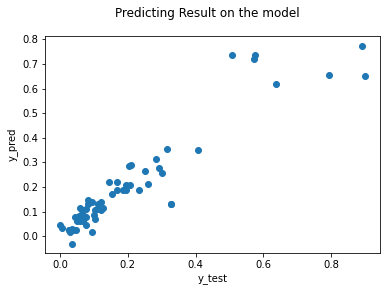

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Predicting Result on the model') 
plt.xlabel('y_test')      
plt.ylabel('y_pred')      
plt.show()

In [83]:
r2_score(y_test, y_pred)

0.8716968033334221

`Inference:` Since the R squared of the model 0.900 is close to the test dataset which is 0.872. Therefore we can confirm that our model is able to generalize on the test dataset.

### The company should consider below factors while entering the market:
- Cars having four cyliners are sold in US market
- Cars having aspiration as standard are having high sales
- Car Base area or car base dimension also plays vital role to decide the price of the car.
- Company belonging to high category like bmw, porsche, jaguar etc are having higher sales. Therefore company should focus on the features and design the car on higher end price.
- Car body is convertible are preferred in the US market.